In [1]:
%matplotlib inline

from matplotlib import pylab as plt
import numpy as np

import sys

##<div id="numpy">Numpy Version</div>

In [5]:
""" Native NumPy Version"""
mu1=0.2
mu2=1.3
k = 8.
epsilon = 0.01
a = 0.12
b = 0.1
delta = 0.0005

N = 128
M = 128

T = 500
t = 0
h = 1./(M + 1)
dt = 1/float(N)
rho = delta*dt/h**2

x = np.linspace(0, 1, M + 2)
y = np.linspace(0, 1, M + 2)
def e0(i,j):
    return (1.-x[i])**4.*(1.-y[j])**4.
def r0(i,j):
    return 1.
e = np.zeros([M + 2, M + 2])
r = np.zeros([M + 2, M + 2])
em = e.copy()
rm = r.copy()

In [6]:
rho = delta*dt/h**2
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(i,j)
        rm[i][j] = r0(i,j)

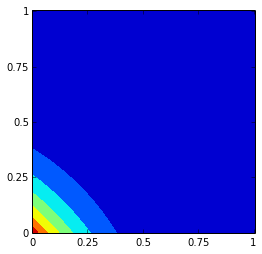

In [22]:
from matplotlib import pylab as plt

plt.figure(figsize=(4,4))
plt.xticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
plt.yticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
im=plt.contourf(em);
plt.savefig("pic%04d.png" %t, dpi=75)

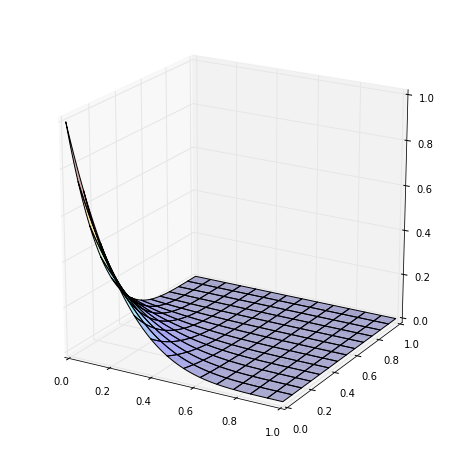

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.view_init(20, 300)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y, em,cmap=plt.cm.jet,alpha=0.3)
#ax.plot_wireframe(x, y, em, rstride=4, cstride=4)

In [ ]:
while t <= T:
    if ((t%10.) < dt):
        # Plot every 10 steps
        plt.figure(figsize=(4,4))
        plt.xticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.yticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.contourf(em)
        plt.savefig("base/base%04d.png" %t, dpi=75)
    # First, add inner points
    em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] +
    em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    # Secondly, add all points
    e = em - dt*(k*em*(em - a)*(em - 1) + em*rm)
    r = rm - dt*(epsilon + mu1*r/(e + mu2))*(r + k*e*(e - b - 1))
    em =e.copy()
    rm = r.copy()
    t += dt

In [4]:
from IPython.core.display import HTML
filename="base.html"
HTML('<div align="center"><iframe src=%s width=460, height=400></iframe></div>' %filename)

<h2>What happens with the following parameters</h2>

$\mathbb \mu_1=0.07, \mu_2=0.3
,k = 8.
,\epsilon = 0.01
,a = 0.1
,b = 0.1
,\delta = 0.00005
,N = 128
,M = 128$

- Neuman Condition:
Here are two formulas; the first is 1st-order accurate and the second is 2nd-order accurate:

$$u'(0) \approx \frac{U_1-U_0}{h}$$

$$u'(0) \approx -\frac{1}{h}\left(\frac{3}{2}U_0 - 2U_1 + \frac{1}{2}U_2\right)$$

- $\mathbf{ \nabla_{\vec n}u|_{\partial \Omega}= 0\to (u_x,u_y)|_{\partial \Omega}=\vec0}$
  \begin{align}
     u_{1,y}^k-u_{0,y}^k&=&0, u_{-1,y}^k-u_{-2,y}^k=0 \\
     u_{x,1}^k-u_{x,0}^k&=&0, u_{x,-1}^k-u_{x,-2}^k=0 
  \end{align}   

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

In [2]:
""" Native NumPy Version"""
mu1=0.07
mu2=0.3
k = 8.
epsilon = 0.01
a = 0.1
b = 0.1
delta = 0.00005

N = 128
M = 128

T = 1000
t = 0
h = 1./(M + 1)
dt = 1/float(N)
rho = delta*dt/h**2

x = np.linspace(0, 1, M + 2)
y = np.linspace(0, 1, M + 2)
def e0(i,j):
    if ((x[i]-1/2.)**2.+(y[j]-1/2.)**2.< 0.05):
       return 1.
    else:
       return 0.
def r0(i,j):
    return 1.
e = np.zeros([M + 2, M + 2])
r = np.zeros([M + 2, M + 2])
em = e.copy()
rm = r.copy()

In [3]:
rho = delta*dt/h**2
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(i,j)
        rm[i][j] = r0(i,j)

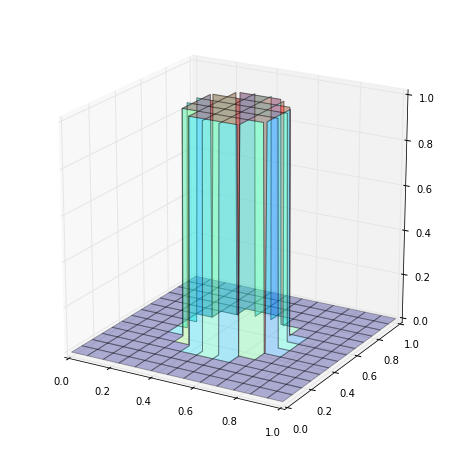

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.view_init(20, 300)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y, em,cmap=plt.cm.jet,alpha=0.3)
#ax.plot_wireframe(x, y, em, rstride=4, cstride=4)

In [4]:
%%bash

dirname="baseNBC"

rm -rf baseNBC
mkdir baseNBC

In [ ]:
plt.ioff()
while t <= T:
    if ((t%100*N) < dt):
        # Plot every 10 steps
        plt.figure(figsize=(4,4))
        plt.xticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.yticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.contourf(em)
        plt.savefig("baseNBC/base%04d.png" %t, dpi=75);
    # First, add inner points
    #em[1:-2, 1:-2] += rho*(em[0:-3, 1:-2] + em[2:, 1:M+1] +
    #em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    #em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] +
    #em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1]) 
    em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] + \
            em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    # Secondly, add all points
    e = em - dt*(k*em*(em - a)*(em - 1) + em*rm)
    r = rm - dt*(epsilon + mu1*r/(e + mu2))*(r + k*e*(e - b - 1))
    # Neumann BC
    e[0,:] = e[1,:]
    e[-1,:] = e[-2,:]
    e[:,0] = e[:,1]
    e[:,-1] = e[:,-2]
    
    em =e.copy()
    rm = r.copy()
    t += dt

In [2]:
from movie import *


In [3]:
movieHTML("baseNBC/base*.png",output='baseNBC')

Found 10 files

Making HTML code for displayingbaseNBC/base0000.pngbaseNBC/base0100.pngbaseNBC/base0200.pngbaseNBC/base0300.pngbaseNBC/base0400.pngbaseNBC/base0500.pngbaseNBC/base0600.pngbaseNBC/base0700.pngbaseNBC/base0800.pngbaseNBC/base0900.png

movie in output file baseNBC.html


In [4]:
from IPython.core.display import HTML
filename="baseNBC.html"
HTML('<div align="center"><iframe src=%s width=460, height=400></iframe></div>' %filename)

In [5]:
import numpy as np
from math import sin,cos,pi 
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
from JSAnimation import IPython_display
from ipywidgets import StaticInteract, RangeWidget,RadioWidget
from IPython.display import clear_output
import time,random
#from scitools.all import movie
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
import os

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
directory = "imgs"
if not os.path.exists(directory):
    os.makedirs(directory)      

In [7]:
n  = 200
#Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065 # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065 # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062 # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062 # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050 # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050 # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050 # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055 # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065 # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060 # Zebrafish
parameters=np.array([0.16, 0.08, 0.050, 0.065])

In [8]:
def GrayScott(parameters,title):
    
    Du=parameters[0];Dv=parameters[1];F=parameters[2];k=parameters[3];
    Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)])
    U,V = Z['U'], Z['V']
    u,v = U[1:-1,1:-1], V[1:-1,1:-1]

    r = 20
    u[...] = 1.0
    U[n/2-r:n/2+r,n/2-r:n/2+r] = 0.50
    V[n/2-r:n/2+r,n/2-r:n/2+r] = 0.25
    u += 0.05*np.random.random((n,n))
    v += 0.05*np.random.random((n,n))
    
    size = np.array(Z.shape)
    dpi = 72.0
    figsize= size[1]/float(dpi),size[0]/float(dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
    fig.suptitle(title,color='red',fontsize=16)
    fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
    #im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
    im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.BuGn)
    plt.xticks([]), plt.yticks([])
    
    for i in xrange(25000):
        Lu = (U[0:-2,1:-1] +U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] +U[2:  ,1:-1] )
        Lv = (V[0:-2,1:-1] +V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] +V[2:  ,1:-1] )

        uvv = u*v*v
        u += (Du*Lu - uvv +  F *(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

        if i % 100 == 0:
           im.set_data(V)
           im.set_clim(vmin=V.min(), vmax=V.max())
           #plt.draw()
           # To make movie
           plt.savefig("imgs/tmp-%03d.png" % (i/100) ,dpi=dpi)
    #movie('imgs/tmp*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
    #       output_file='GrayScott.webm')

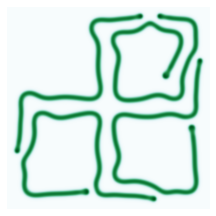

In [9]:
GrayScott(parameters,title='')

In [14]:
movieHTML("imgs/tmp*.png",output='tmpmovie')

Found 250 files

Making HTML code for displayingimgs/tmp-000.pngimgs/tmp-001.pngimgs/tmp-002.pngimgs/tmp-003.pngimgs/tmp-004.pngimgs/tmp-005.pngimgs/tmp-006.pngimgs/tmp-007.pngimgs/tmp-008.pngimgs/tmp-009.pngimgs/tmp-010.pngimgs/tmp-011.pngimgs/tmp-012.pngimgs/tmp-013.pngimgs/tmp-014.pngimgs/tmp-015.pngimgs/tmp-016.pngimgs/tmp-017.pngimgs/tmp-018.pngimgs/tmp-019.pngimgs/tmp-020.pngimgs/tmp-021.pngimgs/tmp-022.pngimgs/tmp-023.pngimgs/tmp-024.pngimgs/tmp-025.pngimgs/tmp-026.pngimgs/tmp-027.pngimgs/tmp-028.pngimgs/tmp-029.pngimgs/tmp-030.pngimgs/tmp-031.pngimgs/tmp-032.pngimgs/tmp-033.pngimgs/tmp-034.pngimgs/tmp-035.pngimgs/tmp-036.pngimgs/tmp-037.pngimgs/tmp-038.pngimgs/tmp-039.pngimgs/tmp-040.pngimgs/tmp-041.pngimgs/tmp-042.pngimgs/tmp-043.pngimgs/tmp-044.pngimgs/tmp-045.pngimgs/tmp-046.pngimgs/tmp-047.pngimgs/tmp-048.pngimgs/tmp-049.pngimgs/tmp-050.pngimgs/tmp-051.pngimgs/tmp-052.pngimgs/tmp-053.pngimgs/tmp-054.pngimgs/tmp-055.pngimgs/tmp-056.pngimgs/tmp-057.pngimgs/tmp-058.pngimgs/tmp

In [16]:
from IPython.core.display import HTML
filename="tmpmovie.html"

HTML('<div align="center"><iframe src=%s width=400, height=300></iframe></div>' %filename)

In [17]:
mysecondwidget = widgets.RadioButtons(values=["Bacteria1","Bacteria2", "Coral","Fingerprint",  
                                            "Spirals", "Sprials Dense","Sprials Fast","Unstable",
                                            "Worms1", "Worms2","Zebrafish"],value="Worms1")
display(mysecondwidget)

In [35]:
if (mysecondwidget.value=='Bacteria1'):
     parameter= np.array([0.16, 0.08, 0.035, 0.065]);
elif (mysecondwidget.value=='Bacteria2'):
     parameter= np.array([0.14, 0.06, 0.035, 0.065]);        
elif (mysecondwidget.value=='Coral'):
     parameters= np.array([0.16, 0.08, 0.054, 0.063 ]);         
elif (mysecondwidget.value=='Fingerprint'):
     parameters= np.array([0.19, 0.05, 0.060, 0.062  ]); 
elif (mysecondwidget.value=='Sprials'):
     parameters= np.array([0.10, 0.10, 0.018, 0.050  ]);
elif (mysecondwidget.value=='Sprials Dense'):
     parameters= np.array([0.12, 0.08, 0.020, 0.050 ]); 
elif (mysecondwidget.value=='Sprials Fast'):
     parameters= np.array([0.10, 0.16, 0.020, 0.050 ]);  
elif (mysecondwidget.value=='Unstable'):
     parameters= np.array([0.16, 0.08, 0.020, 0.055  ]); 
elif (mysecondwidget.value=='Worms1'):
     parameter= np.array([0.16, 0.08, 0.050, 0.065]);
elif (mysecondwidget.value=='Worms2'):
     parameters= np.array([0.16, 0.08, 0.054, 0.063 ]);        
elif (mysecondwidget.value=='Zebrafish'):
     parameters= np.array([0.16, 0.08, 0.035, 0.060 ]);          

In [38]:
GrayScott(parameters,mysecondwidget.value)

In [19]:
from IPython.core.display import HTML
video = open("GrayScott.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [19]:
fwidget = widgets.FloatSlider(description='f value:', min='0.01', max='0.05', step='0.001', value='0.024')
kwidget = widgets.FloatSlider(description='k value:', min='0.04', max='0.07', step='0.005', value='0.055')


In [26]:
display(fwidget)
display(kwidget)

In [27]:
parameters=np.array([fwidget.value,kwidget.value])

In [28]:
parameters

array([ 0.024,  0.055])

In [29]:
def GrayScott2(parameters):
    
    Du=0.01;Dv=0.005;F=parameters[0];k=parameters[1];
    Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)])
    U,V = Z['U'], Z['V']
    u,v = U[1:-1,1:-1], V[1:-1,1:-1]

    r = 4
    u[...] = 1.0
    U[n/2-r:n/2+r,n/2-r:n/2+r] = 0.50
    V[n/2-r:n/2+r,n/2-r:n/2+r] = 0.25
    #u += 0.05*np.random.random((n,n))
    #v += 0.05*np.random.random((n,n))
    
    size = np.array(Z.shape)
    dpi = 72.0
    figsize= size[1]/float(dpi),size[0]/float(dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
    fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
    #im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
    im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.BuGn)
    plt.xticks([]), plt.yticks([])
    
    for i in xrange(25000):
        Lu = (U[0:-2,1:-1] +U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] +U[2:  ,1:-1] )
        Lv = (V[0:-2,1:-1] +V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] +V[2:  ,1:-1] )

        uvv = u*v*v
        u += (Du*Lu - uvv +  F *(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

        if i % 100 == 0:
           im.set_data(V)
           im.set_clim(vmin=V.min(), vmax=V.max())
           #plt.draw()
           # To make movie
           plt.savefig("imgs/tmp-%03d.png" % (i/100) ,dpi=dpi)
    movie('imgs/tmp*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
           output_file='GrayScott.webm')

In [ ]:
GrayScott2(parameters)

In [2]:
from IPython.core.display import HTML
filename="imgs/tmpmovie.html"

HTML('<div align="center"><iframe src=%s width=400, height=320></iframe></div>' %filename)

In [184]:
from IPython.core.display import HTML
video = open("GrayScott.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [19]:
%%bash 

ipython nbconvert --to html reactiondiff-2.ipynb

[NbConvertApp] Using existing profile dir: u'/root/.ipython/profile_default'
[NbConvertApp] Converting notebook reactiondiff-2.ipynb to html
[NbConvertApp] Support files will be in reactiondiff-2_files/
[NbConvertApp] Loaded template full.tpl
[NbConvertApp] Writing 1786802 bytes to reactiondiff-2.html
